# **Business Problem**
**Business Problem:**
Develop comprehensive machine learning models to accurately classify celestial objects as stars, galaxies, or quasars. By utilizing these models, the institute aims to improve astronomical cataloging, research directions, and our understanding of the universe.

**Project Overview:**
This project aims to develop machine learning models to classify celestial objects into stars, galaxies, and quasars. This project aims to faciltate efficient automated classification, insights into distinguishing features, and optimized data processing for large-scale surveys through the predictive models, data visualizations, and a comparative analysis of various algorithms.

**Expected Outcome:**
A classification model robust enough to be integrated into astronomical monitoring systems, capable of automatically identifying stars, galaxies, and quasars with high accuracy, and that can serve as a foundation for the development of new astronomical studies.



# **IMPORTING LIBRARIES**

In [ ]:
# Import of libraries

# System libraries
import re
import unicodedata
import itertools


# Library for file manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pylab as pl
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(style="whitegrid")
palette ='viridis'

import warnings
warnings.filterwarnings('ignore')




# **DATASET LOADING**



1.   **obj_ID:** A unique identifier for each object in the dataset, allowing
for precise tracking and referencing throughout the analysis.

2.   **alpha (Right Ascension) & delta (Declination):** These coordinates define the object's position in the sky, similar to latitude and longitude on Earth. They are essential for locating celestial objects and conducting spatial analysis.

3. **u, g, r, i, z:** These photometric measurements represent the intensity of light detected in different wavelengths (ultraviolet to infrared). Analyzing these values helps in determining the object's temperature, chemical composition, and distance from Earth.

4. **run_ID & rereun_ID:** These identifiers specify the scan session and processing rerun of the data, ensuring that each observation is correctly matched with its imaging session.

5. **cam_col (Camera Column):** Indicates the specific scanline within a run, useful for identifying the exact instrument settings used during observation.

6. **field_ID:** Identifies the specific field of view during the observation, helping researchers understand the context of the data collected.

7. **spec_obj_ID:** A unique identifier for objects with spectroscopic measurements, linking photometric and spectroscopic data for more detailed analysis.


8. **class:**The categorical classification of the object (e.g., galaxy, star, quasar), which is the target variable for our machine learning models.


9. **redshift:** A measure of how much the light has shifted toward longer wavelengths due to the object's motion away from Earth, which is crucial for estimating distances and velocities.


10. **plate, MJD, fiber_ID:** These features provide information about the specific observations and instruments used, ensuring the data's reliability and facilitating future comparisons.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/star_classification.csv")
df

obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      19.16573  18.79371    3606       301        2        79  6.543777e+18   
1      21.16812  21.61427    4518       301        5       119  1.176014e+19   
2      19.34857  18.94827    3606       301        2       120  5.152200e+18   
3      20.50454  19.25010    4192       301        3       214  1.030107e+19   
4      15.97711  15.54461    8102       301        3       137  6.891865e+18   
...         ...       ...     ...       ...      ...       ...           ...   
99995  21.30548  20.73569    7778       301        2       581  1.055431e+19   
99996  19.75759  19.41526    7917       301        1       289  8.586351e+18   
99997  17.69034  17.35221    5314       301        4       308  3.112008e+18   
99998  19.07254  18.62482    3650       301        4       131  7.601080e+18   
99999  20.00959  19.28075    3650       301        4        60  8.343152e+18   

        class  redshift  plate    MJD  fiber_ID  
0      GALAXY  0.634794   5812  56354       171  
1      GALAXY  0.779136  10445  58158       427  
2      GALAXY  0.644195   4576  55592       299  
3      GALAXY  0.932346   9149  58039       775  
4      GALAXY  0.116123   6121  56187       842  
...       ...       ...    ...    ...       ...  
99995  GALAXY  0.000000   9374  57749       438  
99996  GALAXY  0.404895   7626  56934       866  
99997  GALAXY  0.143366   2764  54535        74  
99998  GALAXY  0.455040   6751  56368       470  
99999  GALAXY  0.542944   7410  57104       851  

[100000 rows x 18 columns]

In [ ]:
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [ ]:
df.tail()

obj_ID       alpha      delta         u         g         r  \
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
99995  21.30548  20.73569    7778       301        2       581  1.055431e+19   
99996  19.75759  19.41526    7917       301        1       289  8.586351e+18   
99997  17.69034  17.35221    5314       301        4       308  3.112008e+18   
99998  19.07254  18.62482    3650       301        4       131  7.601080e+18   
99999  20.00959  19.28075    3650       301        4        60  8.343152e+18   

        class  redshift  plate    MJD  fiber_ID  
99995  GALAXY  0.000000   9374  57749       438  
99996  GALAXY  0.404895   7626  56934       866  
99997  GALAXY  0.143366   2764  54535        74  
99998  GALAXY  0.455040   6751  56368       470  
99999  GALAXY  0.542944   7410  57104       851

In [ ]:
df.shape

(100000, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [ ]:
df.dtypes

obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [ ]:
data = df.copy()

In [ ]:
df_encoded = pd.get_dummies(df, columns=['class'], prefix='class')
df_encoded

obj_ID       alpha      delta         u         g         r  \
0      1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1      1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2      1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3      1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4      1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   
...             ...         ...        ...       ...       ...       ...   
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0      19.16573  18.79371    3606       301        2        79  6.543777e+18   
1      21.16812  21.61427    4518       301        5       119  1.176014e+19   
2      19.34857  18.94827    3606       301        2       120  5.152200e+18   
3      20.50454  19.25010    4192       301        3       214  1.030107e+19   
4      15.97711  15.54461    8102       301        3       137  6.891865e+18   
...         ...       ...     ...       ...      ...       ...           ...   
99995  21.30548  20.73569    7778       301        2       581  1.055431e+19   
99996  19.75759  19.41526    7917       301        1       289  8.586351e+18   
99997  17.69034  17.35221    5314       301        4       308  3.112008e+18   
99998  19.07254  18.62482    3650       301        4       131  7.601080e+18   
99999  20.00959  19.28075    3650       301        4        60  8.343152e+18   

       redshift  plate    MJD  fiber_ID  class_GALAXY  class_QSO  class_STAR  
0      0.634794   5812  56354       171          True      False       False  
1      0.779136  10445  58158       427          True      False       False  
2      0.644195   4576  55592       299          True      False       False  
3      0.932346   9149  58039       775          True      False       False  
4      0.116123   6121  56187       842          True      False       False  
...         ...    ...    ...       ...           ...        ...         ...  
99995  0.000000   9374  57749       438          True      False       False  
99996  0.404895   7626  56934       866          True      False       False  
99997  0.143366   2764  54535        74          True      False       False  
99998  0.455040   6751  56368       470          True      False       False  
99999  0.542944   7410  57104       851          True      False       False  

[100000 rows x 20 columns]

# **EXPLOARATORY DATA ANALYSIS**

1. What is the distribution of objects
(stars, galaxies, and quasars) in the dataset?





*   This can be answered by analyzing the
frequency distribution of the class column.

*   Python Analysis: You can use pandas to calculate the value counts, and matplotlib or seaborn to visualize the distribution.



---



2. Are there any missing or inconsistent data points in the dataset?






*   Check for null values or anomalies in features like alpha, delta, redshift, etc.

*   Python Analysis: Use pandas to identify missing values and describe() to identify outliers or unexpected values.


---


3. Is there a strong correlation between specific spectral features (e.g., u, g, r, i, z) and the object classification?






*   This would involve calculating the correlation matrix between features and the target variable (class).

*   Python Analysis: You can use pandas for the correlation matrix and seaborn for heatmap visualizations





class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


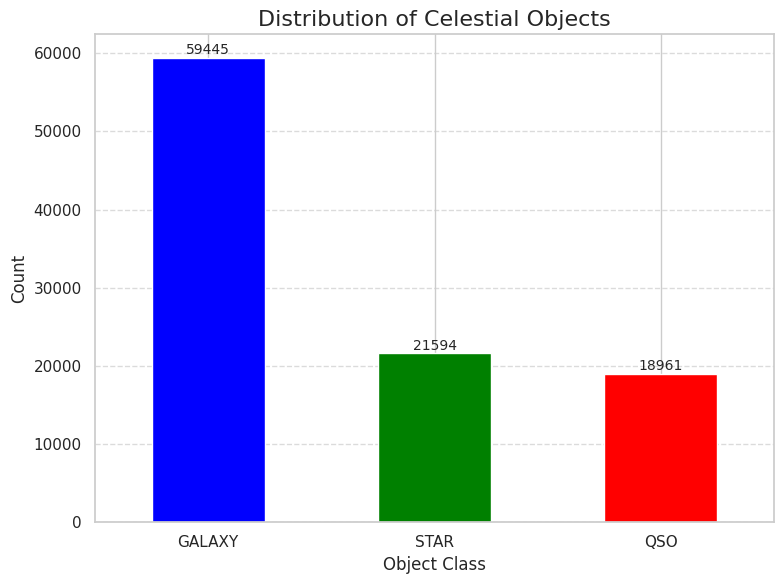

In [ ]:
class_distribution = df['class'].value_counts()
print(class_distribution)

plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color =['blue','green','red'])

plt.title('Distribution of Celestial Objects', fontsize=16)
plt.xlabel('Object Class', fontsize=12)
plt.ylabel('Count', fontsize=12)

for index, value in enumerate(class_distribution):
    plt.text(index, value + 500, f'{value}', ha='center', fontsize=10)

plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
a, b, c = df["class"].value_counts() / len(df)
print(f"Total percentage of Galaxies : {round(a*100, 1)}%")
print(f"Total percentage of Stars : {round(b*100, 1)}%")
print(f"Total percentage of QSO : {round(c*100, 1)}%")

Total percentage of Galaxies : 59.4%
Total percentage of Stars : 21.6%
Total percentage of QSO : 19.0%


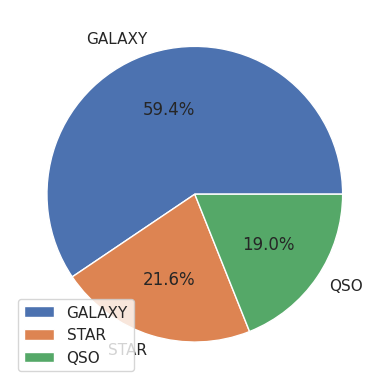

In [ ]:
plt.pie(df['class'].value_counts(),autopct="%1.1f%%",labels=['GALAXY','STAR','QSO'])
plt.legend();

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)


obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [ ]:
description = df.describe()
print(description)

             obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      1

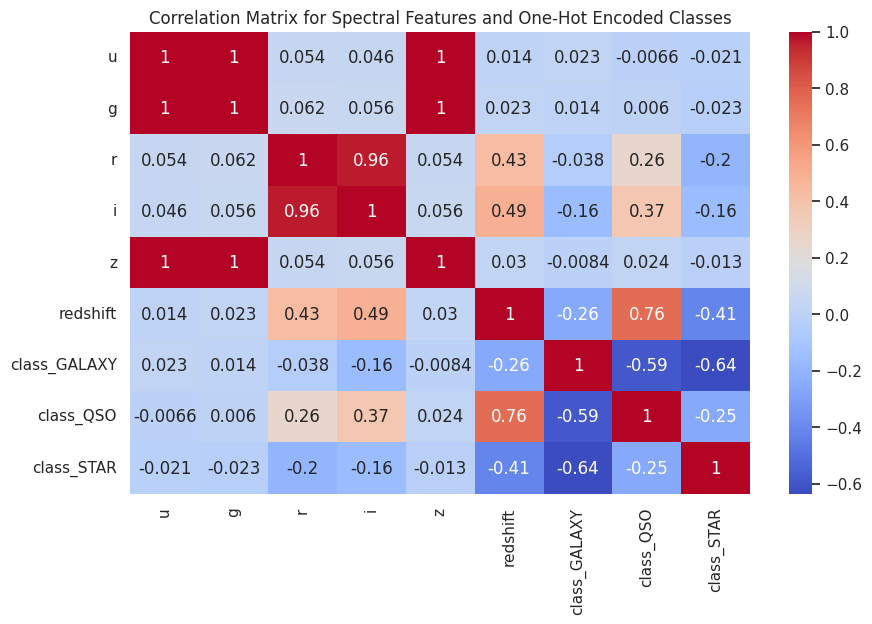

In [ ]:
# Select the spectral columns and the newly one-hot encoded class columns
spectral_columns = ['u', 'g', 'r', 'i', 'z', 'redshift']
correlation_matrix = df_encoded[spectral_columns + ['class_GALAXY', 'class_QSO', 'class_STAR']].corr()

# Display the correlation matrix
correlation_matrix

# View the correlation matrix with heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Spectral Features and One-Hot Encoded Classes')
plt.show()

**Strongest Correlations:** The r vs i correlation of 0.96 is the highest in the dataset, which suggests that these two spectral bands are closely related and likely represent similar emission characteristics of celestial objects. It implies that the red and infrared portions of the spectrum tend to behave similarly in the objects observed, possibly due to their shared origins in stellar emission processes.

**Moderate Correlations:** Several other correlations, like g vs r and g vs i, fall into the moderate range (0.5-0.6), indicating that while these features are related, they do not follow as closely as the red and infrared correlations. These correlations might reflect the broader range of emission behaviors in galaxies and stars.

**Weakest Correlations:** The u vs i correlation of 0.46 is one of the lower values, suggesting that the ultraviolet and infrared parts of the spectrum are less tightly linked compared to the red and infrared bands. This may be expected, as ultraviolet radiation often originates from different processes (like hot, young stars) compared to infrared, which can come from cooler regions or older stars.

**Conclusion:** The r and i bands show the strongest relationship, indicating similar emission characteristics in the red and infrared regions. Understanding these correlations can help astronomers develop more accurate models for interpreting the physical properties of galaxies, stars, and quasars.

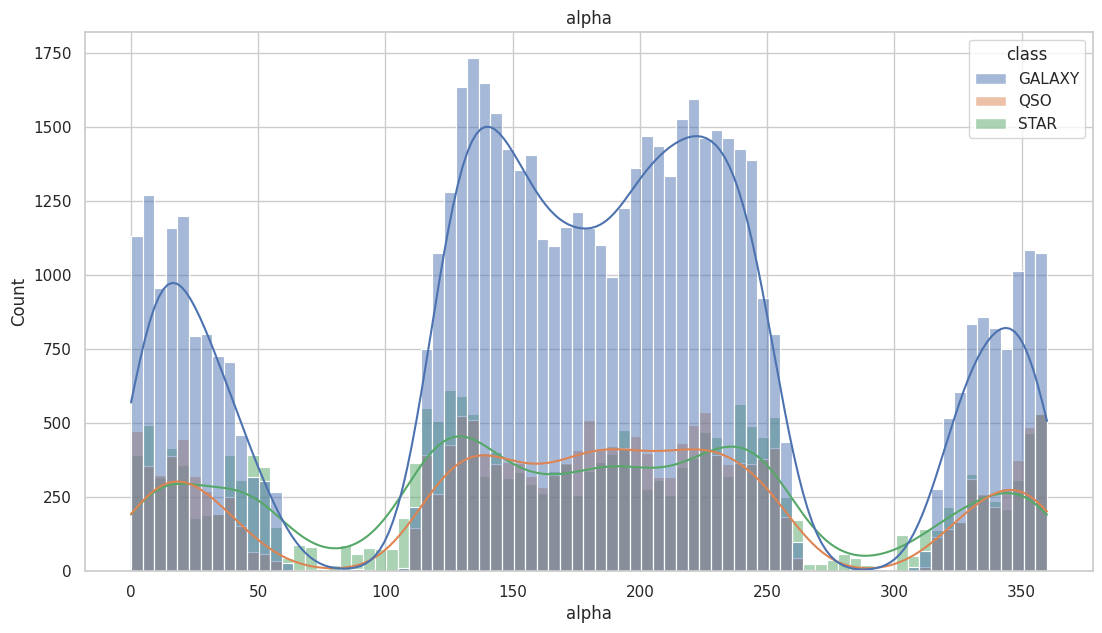

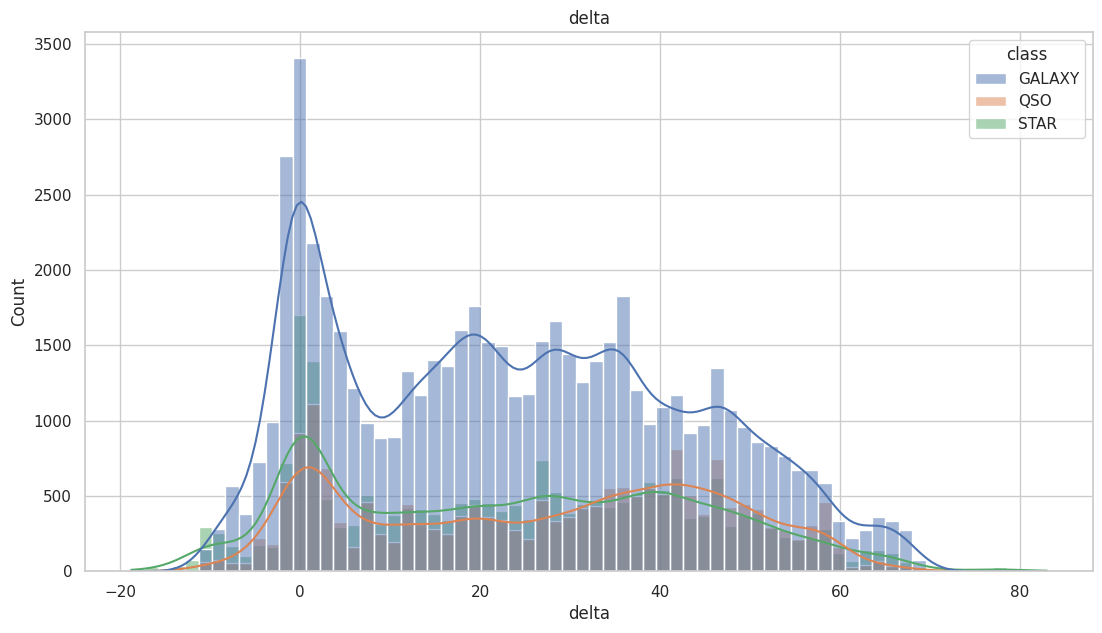

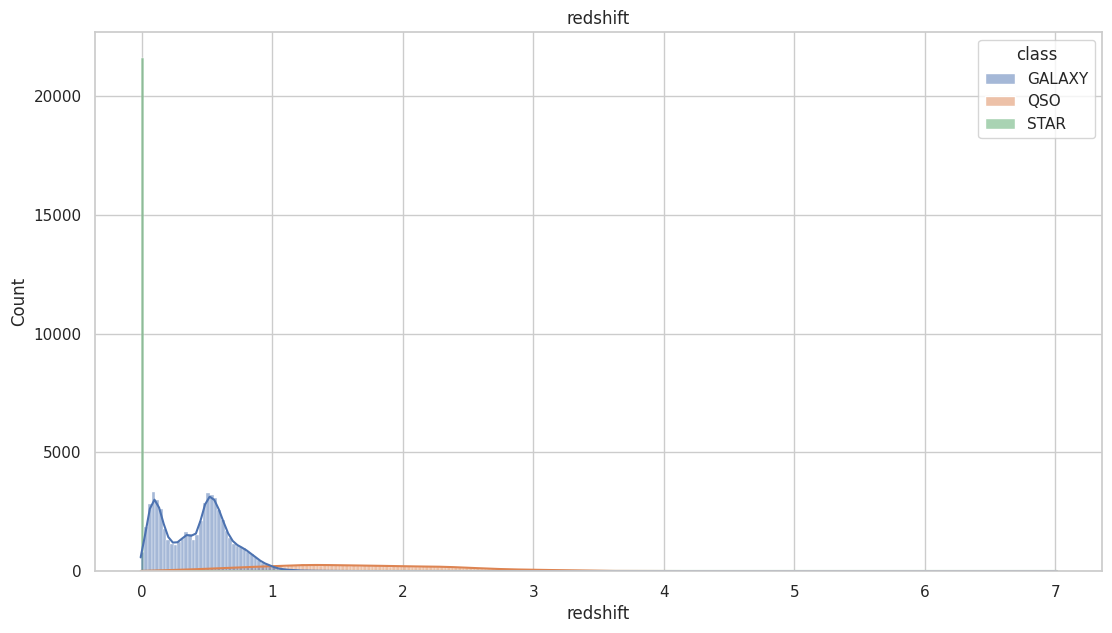

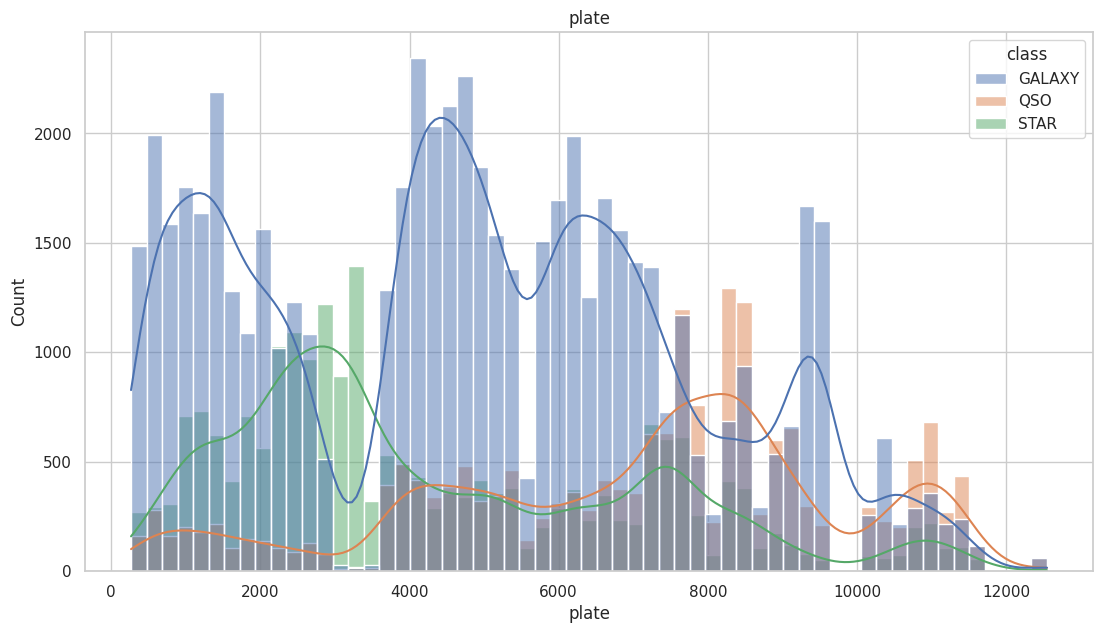

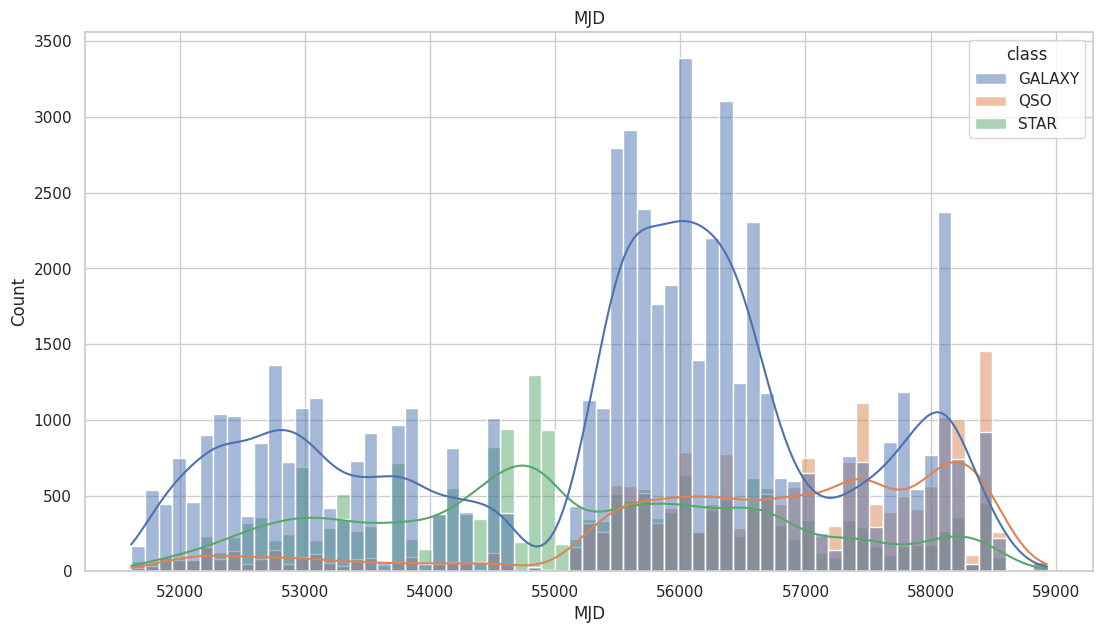

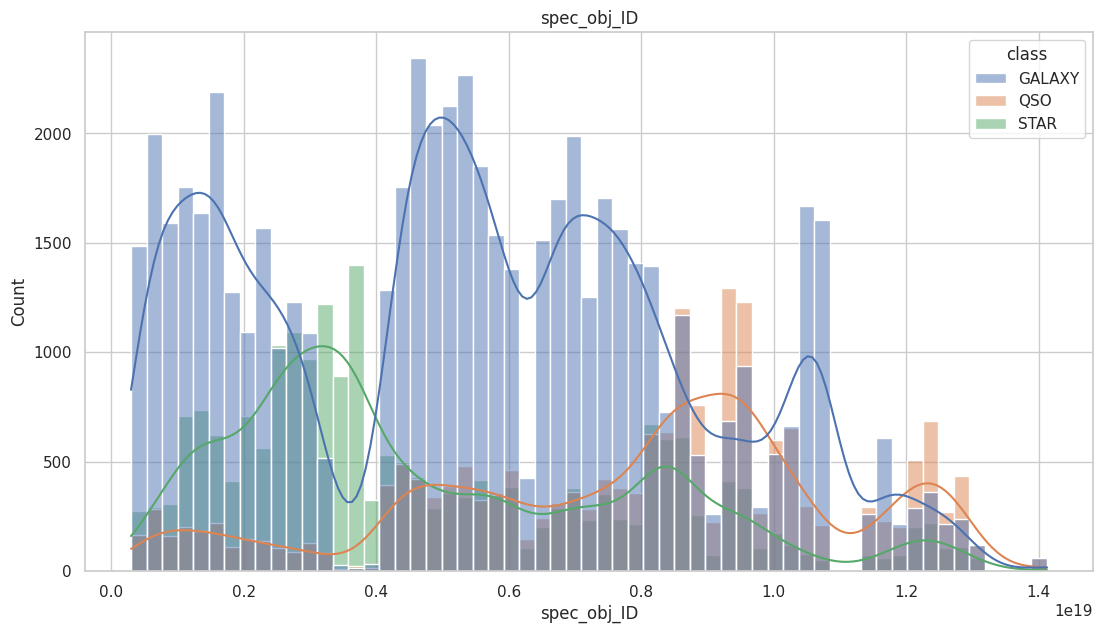

In [ ]:
for i in ['alpha', 'delta','redshift', 'plate', 'MJD' , 'spec_obj_ID']:
    plt.figure(figsize=(13,7))
    sns.histplot(data=df, x=i, kde=True, hue="class")
    plt.title(i)
    plt.show()

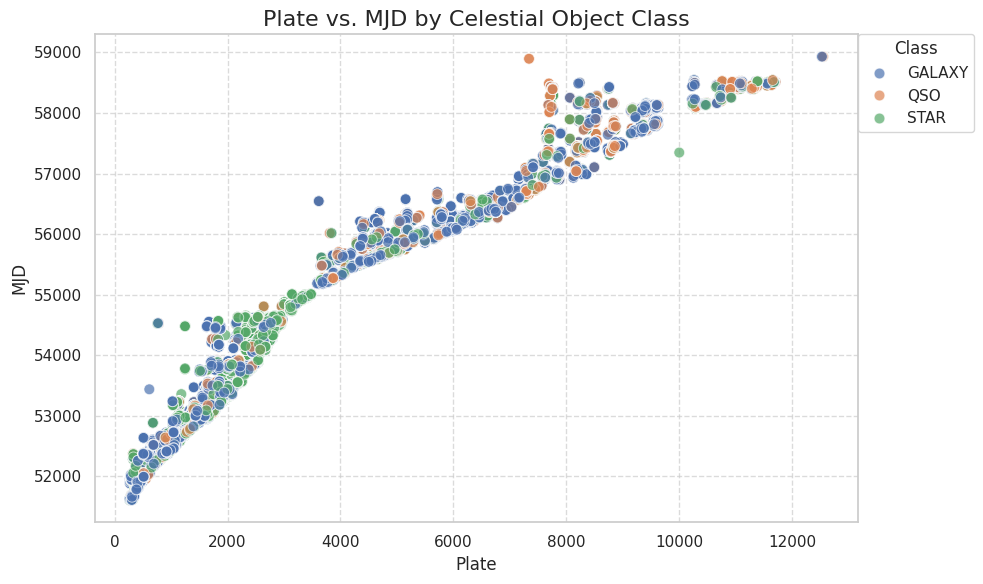

In [ ]:
# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size for better visibility
sns.scatterplot(x="plate", y="MJD", data=df, hue="class", s=60, alpha=0.7, edgecolor="white")

# Add a title and axis labels
plt.title('Plate vs. MJD by Celestial Object Class', fontsize=16)
plt.xlabel('Plate', fontsize=12)
plt.ylabel('MJD', fontsize=12)

# Adjust the legend position
plt.legend(title='Class', loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0)

# Optional: Adjust grid lines for clarity
plt.grid(True, linestyle='--', alpha=0.7)

# Ensure everything fits well
plt.tight_layout()
plt.show()

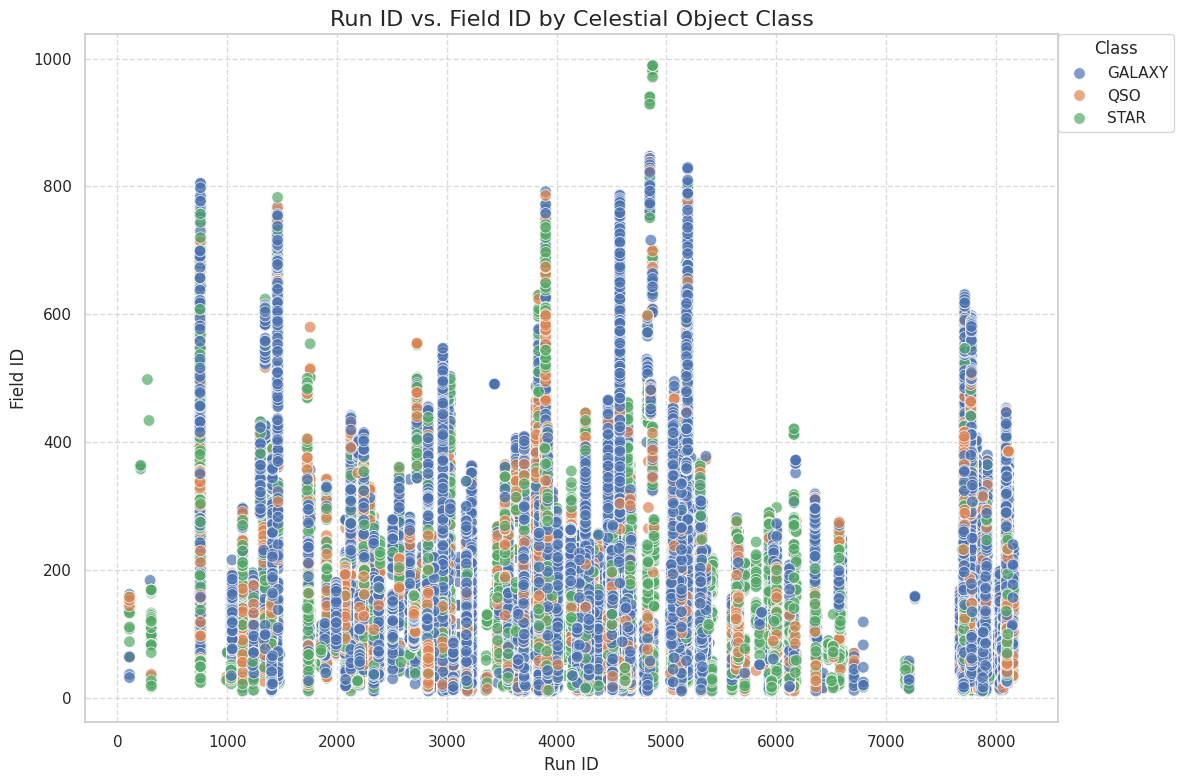

In [ ]:
# Create the scatter plot
plt.figure(figsize=(12, 8))  # Increase figure size for clarity
sns.scatterplot(x="run_ID", y="field_ID", data=df, hue="class", s=70, alpha=0.7, edgecolor="white")

# Add a title and axis labels
plt.title('Run ID vs. Field ID by Celestial Object Class', fontsize=16)
plt.xlabel('Run ID', fontsize=12)
plt.ylabel('Field ID', fontsize=12)

# Adjust the legend position and ensure it's outside the plot for clarity
plt.legend(title='Class', loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout for a cleaner appearance
plt.tight_layout()
plt.show()

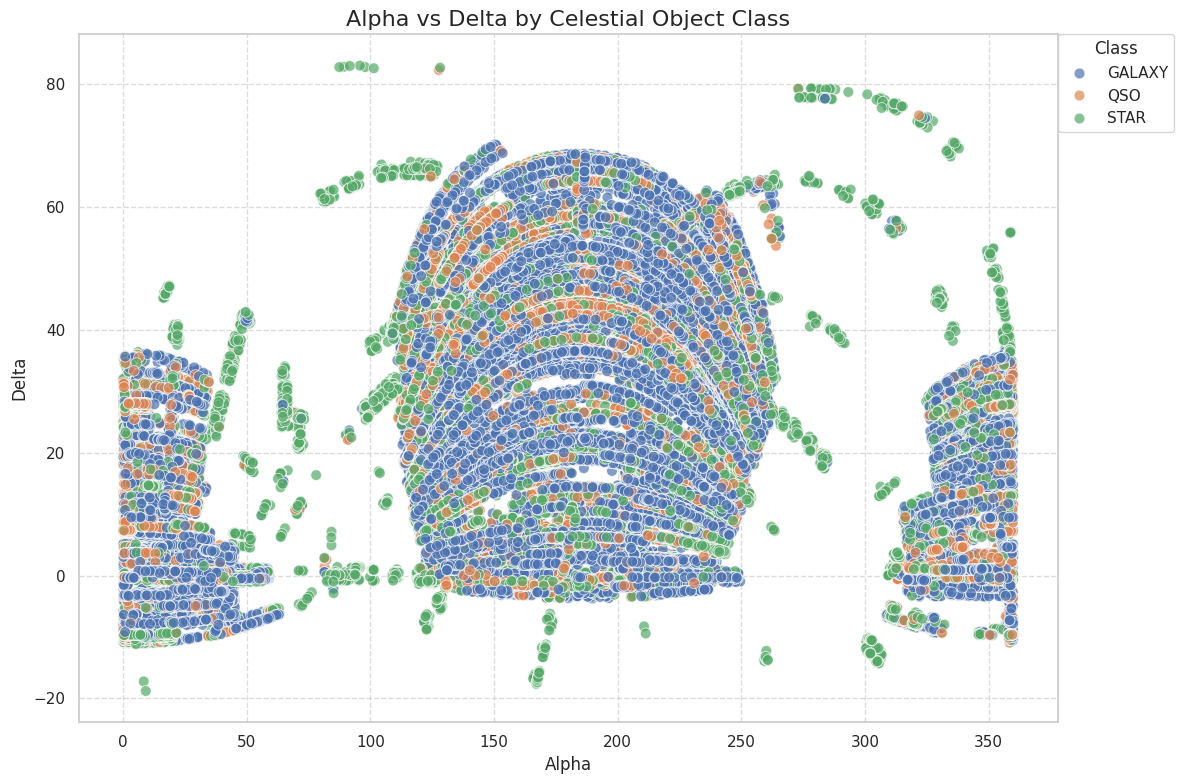

In [ ]:
# Create scatter plot
plt.figure(figsize=(12, 8))  # Increase figure size for better visibility
sns.scatterplot(x="alpha", y="delta", data=df, hue="class", s=60, alpha=0.7, edgecolor="white")

# Add title and axis labels
plt.title('Alpha vs Delta by Celestial Object Class', fontsize=16)
plt.xlabel('Alpha', fontsize=12)
plt.ylabel('Delta', fontsize=12)

# Move legend outside the plot
plt.legend(title='Class', loc='upper left', bbox_to_anchor=(1, 1), borderaxespad=0)

# Adjust grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Tight layout for cleaner appearance
plt.tight_layout()
plt.show()

Text(0, 0.5, 'redshift')

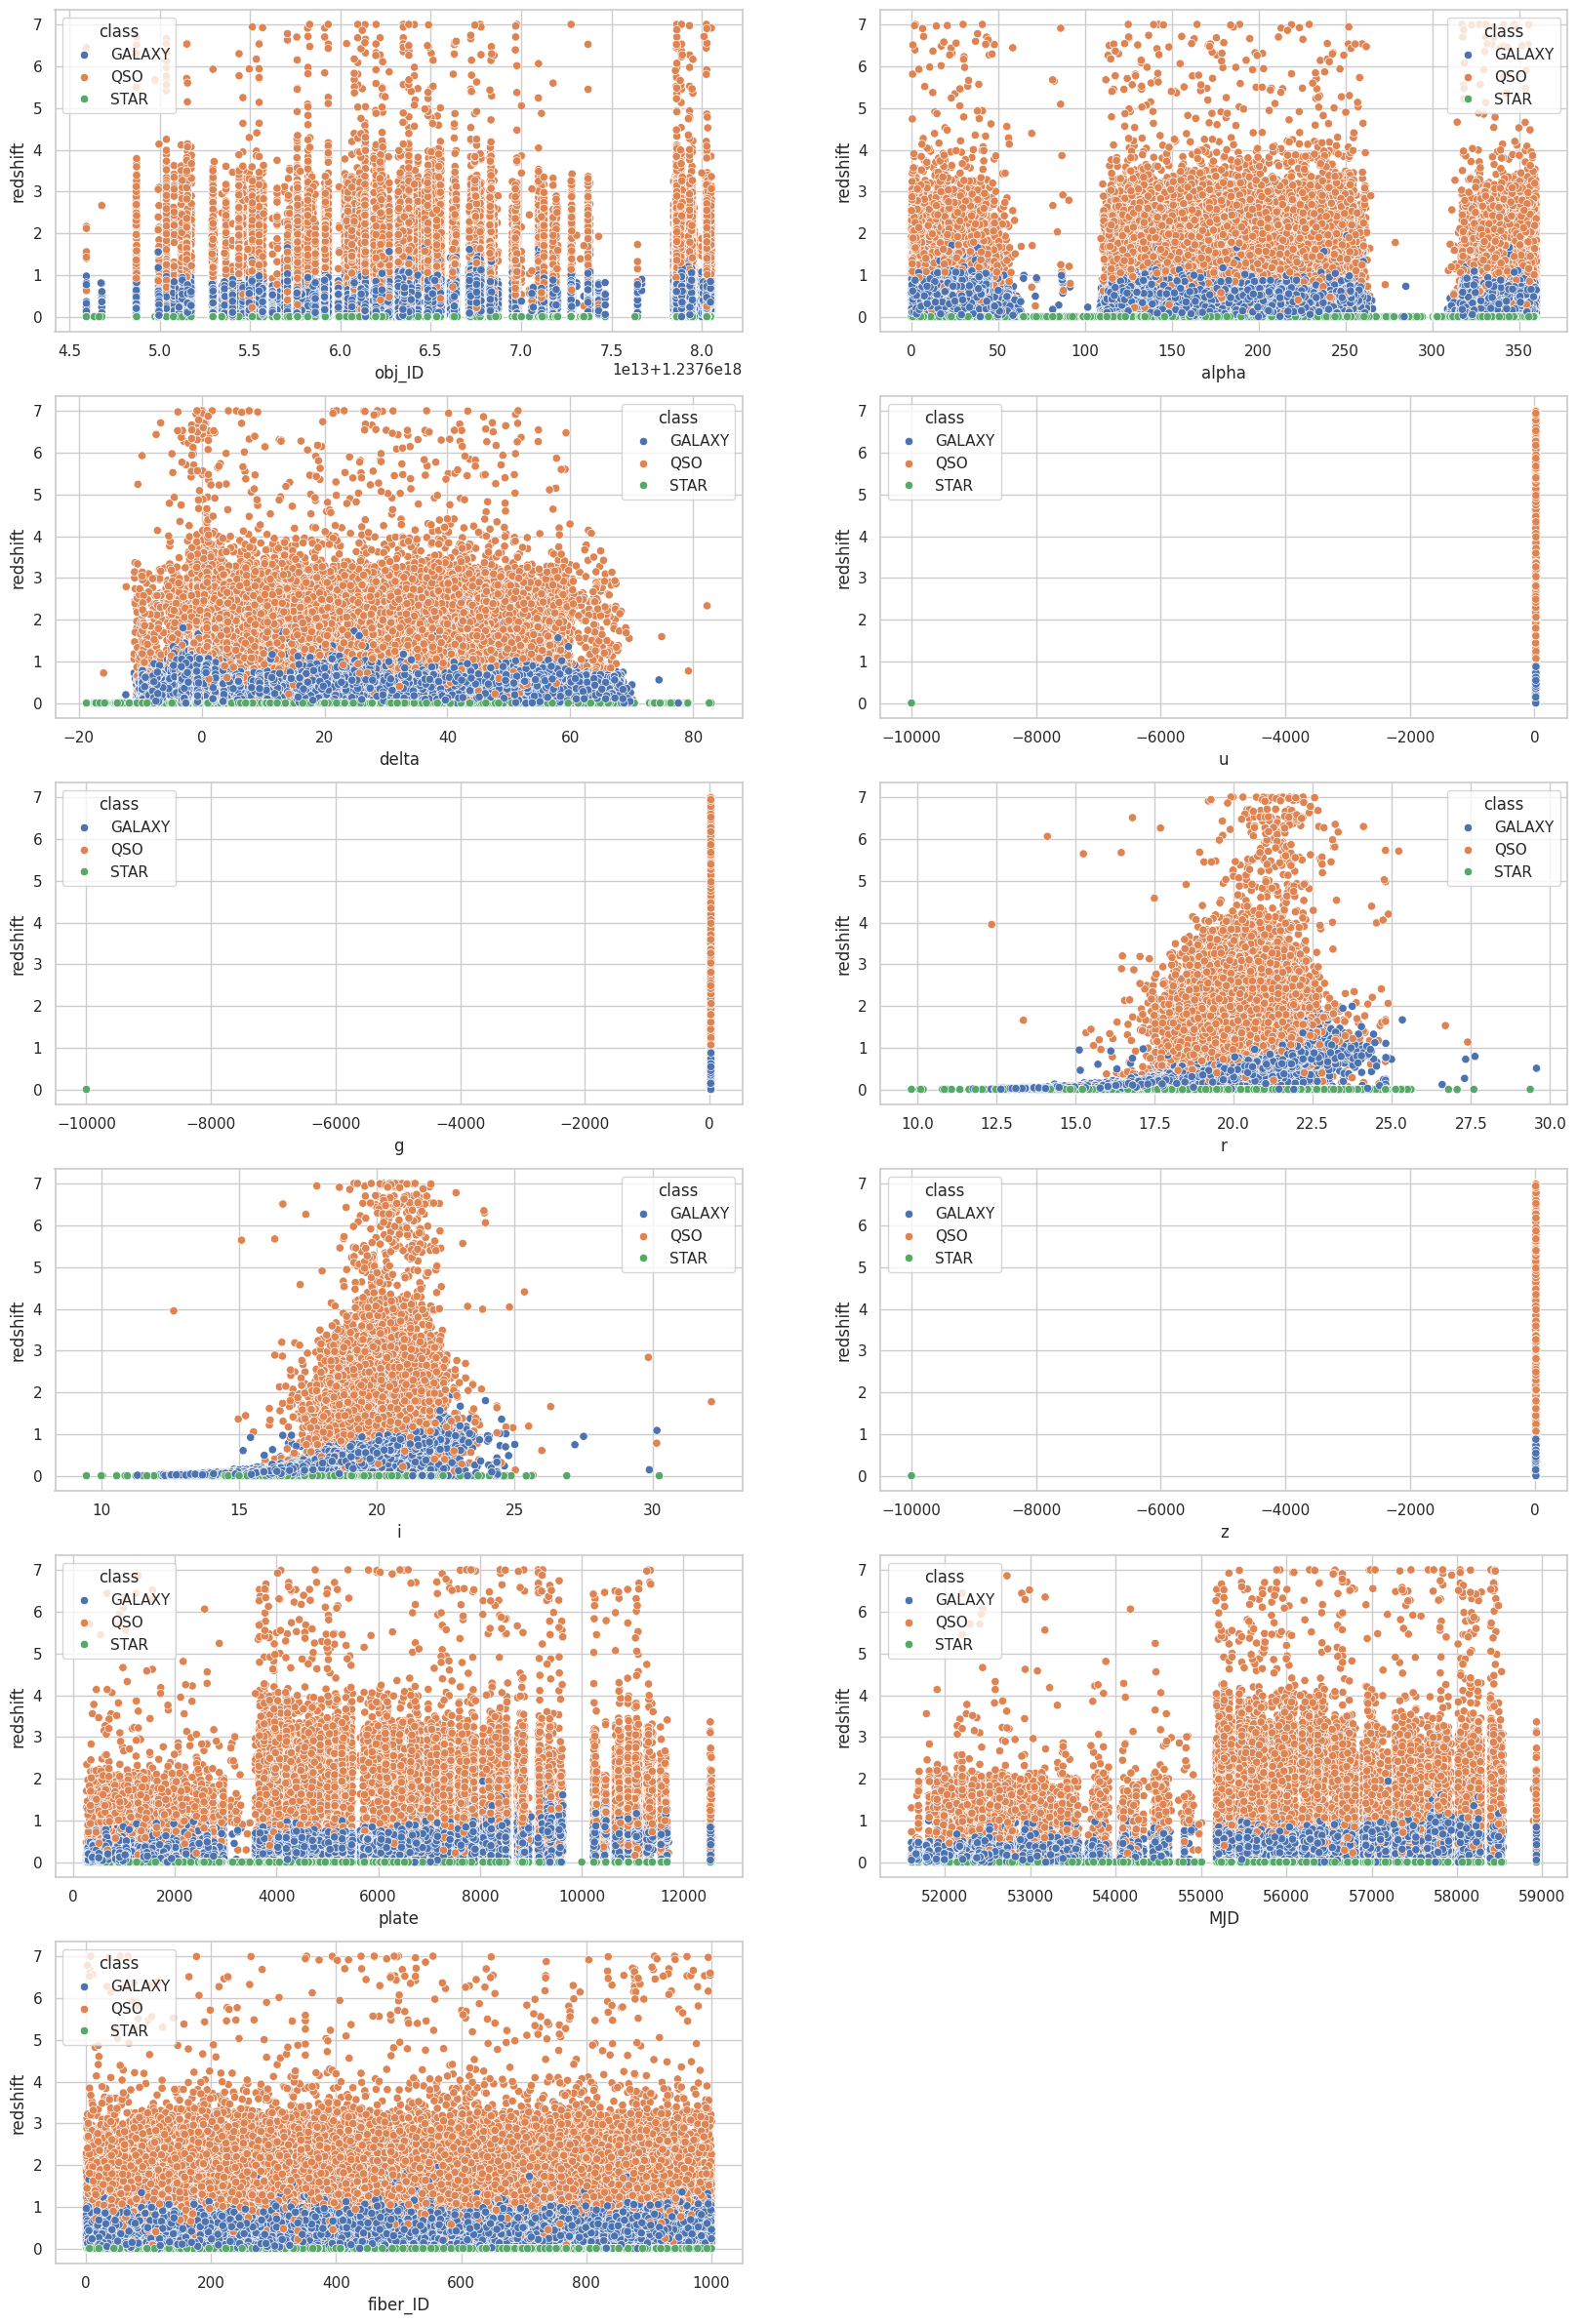

In [ ]:
plt.figure(figsize=(20, 30))

plt.subplot(6, 2, 1)
sns.scatterplot(x="obj_ID", y="redshift", data=df, hue="class")  # Add hue="class"
plt.xlabel('obj_ID')
plt.ylabel('redshift')

plt.subplot(6, 2, 2)
sns.scatterplot(x="alpha", y="redshift", data=df, hue="class")  # Add hue="class"
plt.xlabel('alpha')
plt.ylabel('redshift')

plt.subplot(6, 2, 3)
sns.scatterplot(x="delta", y="redshift", data=df, hue="class")  # Add hue="class"
plt.xlabel('delta')
plt.ylabel('redshift')

plt.subplot(6, 2, 4)
sns.scatterplot(x="u", y="redshift", data=df, hue="class")  # Add hue="class"
plt.xlabel('u')
plt.ylabel('redshift')

plt.subplot(6, 2, 5)
sns.scatterplot(x="g", y="redshift", data=df, hue="class")  # Add hue="class"
plt.xlabel('g')
plt.ylabel('redshift')

plt.subplot(6, 2, 6)
sns.scatterplot(x="r", y="redshift", data=df, hue="class")  # Add hue="class"
plt.xlabel('r')
plt.ylabel('redshift')

plt.subplot(6, 2, 7)
sns.scatterplot(x="i", y="redshift", data=df, hue="class")  # Add hue="class"
plt.xlabel('i')
plt.ylabel('redshift')

plt.subplot(6, 2, 8)
sns.scatterplot(x="z", y="redshift", data=df, hue="class")  # Add hue="class"
plt.xlabel('z')
plt.ylabel('redshift')

plt.subplot(6, 2, 9)
sns.scatterplot(x="plate", y="redshift", data=df, hue="class")  # Add hue="class"
plt.xlabel('plate')
plt.ylabel('redshift')

plt.subplot(6, 2, 10)
sns.scatterplot(x="MJD", y="redshift", data=df, hue="class")  # Add hue="class"
plt.xlabel('MJD')
plt.ylabel('redshift')

plt.subplot(6, 2, 11)
sns.scatterplot(x="fiber_ID", y="redshift", data=df, hue="class")  # Add hue="class"
plt.xlabel('fiber_ID')
plt.ylabel('redshift')



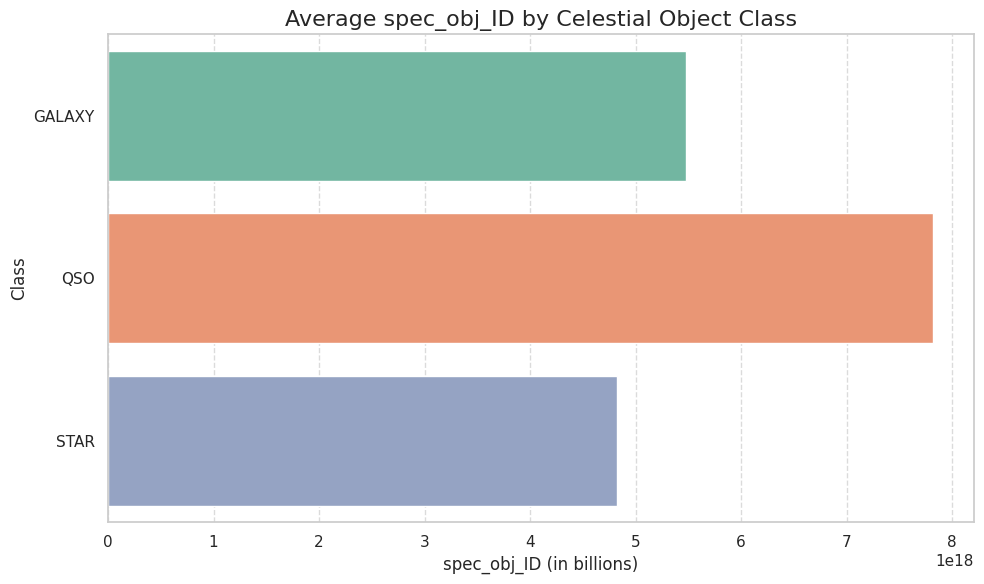

In [ ]:
# Create bar plot
plt.figure(figsize=(10, 6))  # Increase figure size for clarity
sns.barplot(x="spec_obj_ID", y="class", data=df, ci=None, palette="Set2")

# Add title and axis labels
plt.title('Average spec_obj_ID by Celestial Object Class', fontsize=16)
plt.xlabel('spec_obj_ID (in billions)', fontsize=12)  # Modify the label for better clarity
plt.ylabel('Class', fontsize=12)

# Optionally format the x-axis to avoid scientific notation
#plt.ticklabel_format(style='plain', axis='x')

# Add gridlines for better comparison
plt.grid(True, which='both', axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

# **DATA CLEANING**

In [ ]:
df.drop(['obj_ID'],axis=1,inplace=True)
df.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID   class  redshift  plate  \
0    3606       301        2        79  6.543777e+18  GALAXY  0.634794   5812   
1    4518       301        5       119  1.176014e+19  GALAXY  0.779136  10445   
2    3606       301        2       120  5.152200e+18  GALAXY  0.644195   4576   
3    4192       301        3       214  1.030107e+19  GALAXY  0.932346   9149   
4    8102       301        3       137  6.891865e+18  GALAXY  0.116123   6121   

     MJD  fiber_ID  
0  56354       171  
1  58158       427  
2  55592       299  
3  58039       775  
4  56187       842

In [ ]:
# Checking for blank data
blank_data = df.isnull().sum()
print("Blank data by column:")
print(blank_data)

Blank data by column:
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [ ]:
# Checking for NaN data
nan_data_by_column = df.isna().sum()
nan_total_data = df.isna().sum().sum()

print("NaN data by column:")
print(nan_data_by_column)
print("\nTotal NaN data in DataFrame:", nan_total_data)

NaN data by column:
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Total NaN data in DataFrame: 0


In [ ]:
df.to_csv('cleaned_data.csv', index=False)

# **FEATURE ENGINEERING**

**1.Feature Engineering**

Feature engineering is a crucial step in the data preparation process in data science and machine learning. It involves the creation or transformation of variables (also known as features) to improve the performance of machine learning models. Good feature engineering can increase model accuracy, reduce overfitting, and consequently generate more meaningful insights from the data.

**2.Label Encoder**

Label Encoding is a commonly used technique to convert categorical variables into numerical ones. Label Encoder assigns a unique value to each category present in the categorical variable. For example, if we have a variable called "Size" with categories "Small," "Medium," and "Large," the Label Encoder might assign the values 0, 1, and 2, respectively, to these categories. In this way, the categories are represented by integers, making them suitable for analysis by machine learning algorithms. It is important to mention that Label Encoder is more appropriate for ordinal categorical variables, where there is an intrinsic order between the categories.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Creating the Label encoder
Label_pre = LabelEncoder()
data_cols=df.select_dtypes(exclude=['int','float']).columns
label_col =list(data_cols)

# Applying encoder
df[label_col]= df[label_col].apply(lambda col:Label_pre.fit_transform(col))

# Saved dataset with Label Encoder
df.to_csv("dataset_LabelEncoder.csv")

# Viewing
Label_pre

LabelEncoder()

In [ ]:
# Viewing
df.head()

alpha      delta         u         g         r         i         z  \
0  135.689107  32.494632  23.87882  22.27530  20.39501  19.16573  18.79371   
1  144.826101  31.274185  24.77759  22.83188  22.58444  21.16812  21.61427   
2  142.188790  35.582444  25.26307  22.66389  20.60976  19.34857  18.94827   
3  338.741038  -0.402828  22.13682  23.77656  21.61162  20.50454  19.25010   
4  345.282593  21.183866  19.43718  17.58028  16.49747  15.97711  15.54461   

   run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  class  redshift  plate  \
0    3606       301        2        79  6.543777e+18      0  0.634794   5812   
1    4518       301        5       119  1.176014e+19      0  0.779136  10445   
2    3606       301        2       120  5.152200e+18      0  0.644195   4576   
3    4192       301        3       214  1.030107e+19      0  0.932346   9149   
4    8102       301        3       137  6.891865e+18      0  0.116123   6121   

     MJD  fiber_ID  
0  56354       171  
1  58158       427  
2  55592       299  
3  58039       775  
4  56187       842

# **TRAINING AND TESTING DIVISON**

In [ ]:
# Split the data into features (X) and target (y)
X = df.drop("class", axis=1) # Drop the target column to get the features
y = df["class"] # Set the target column

In [ ]:
# Visualize rows and column x
X.shape

(100000, 16)

# **MODEL TRAINING AND TESTING**

A crucial step after data preparation is model training. This involves splitting the data into training and test sets. This division allows for evaluating the model's performance on unseen data during training, helping to avoid overfitting and assess the model's generalization capability.

In practice, it is common to adopt a standard split, such as the popular 80% for training and 20% for testing.This practice of data splitting is fundamental to ensure that the model is robust and capable of generalizing to new, unseen data during training.

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Visualize training data
print("Rows and columns of training data X_train:", X_train.shape)
print("Rows and columns of training data y_train:", X_train.shape)


Rows and columns of training data X_train: (80000, 16)
Rows and columns of training data y_train: (80000, 16)


# **MACHINE LEARNING MODELS**

During the training process, we closely monitor the performance of each model, aiming to identify the one that best fits the data and provides the most accurate predictions. This stage is crucial as it allows us to evaluate and compare the performance of each algorithm, thereby selecting the most effective machine learning model for our specific application.

**Logistic Regression:** A linear model used for solving binary classification problems.

**Naive Bayes:** A probabilistic model based on Bayes' theorem, suitable for classification problems with independent features.

**Decision Tree:** A model that uses a tree structure to represent hierarchical decision rules.

**Random Forest:** An ensemble learning technique that combines multiple decision trees to improve model accuracy and robustness.

**AdaBoost:** Another ensemble learning algorithm that iteratively adjusts the weights of observations to focus on the most challenging cases.

**Gradient Boosting:** An ensemble learning technique that builds decision trees sequentially, optimizing a specific loss criterion.

**XGBoost:** An efficient implementation of gradient boosting, known for its speed and superior performance.

# Training and Evaluation

Each of these algorithms is being trained and tuned using best practices in machine learning. After training, we evaluate the performance of each model on a validation set, using metrics appropriate to our problem, such as accuracy, recall, F1-score, among others.

# Selection of the Best Model

At the end of this process, we will compare the performance of all models and select the one that shows the best results according to our evaluation criteria. This choice will be based not only on the performance metric but also on the interpretability of the model

In [ ]:
# Importing libraries for various classification models and performance evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# 7. List of models to be evaluated
models = [

    # Naive Bayes model (good for small datasets, assumes independence between features)
    GaussianNB(),

    # Decision Tree model (simple and interpretable, prone to overfitting)
    DecisionTreeClassifier(random_state=42),

    # Random Forest (ensemble of decision trees, reduces overfitting and improves accuracy)
    RandomForestClassifier(n_estimators=100, random_state=42),

    # Logistic Regression (linear model, great for binary classification problems)
    LogisticRegression(random_state=50, max_iter=1000),

    # AdaBoost (boosting algorithm, combines weak learners to create a strong classifier)
    AdaBoostClassifier(random_state=45),

    # XGBoost (powerful gradient boosting algorithm, handles missing data well and has regularization)
    XGBClassifier(random_state=42),

    # K-Nearest Neighbors (instance-based learning, predicts class based on closest neighbors)
    KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),

    # Gradient Boosting (boosting technique that builds models sequentially to reduce errors)
    GradientBoostingClassifier(random_state=42)
]

# 10. Loop through each model and evaluate performance on training and test data
for i, model in enumerate(models):

    # Train the model on the training dataset
    model.fit(X_train, y_train)

    # Calculate the training accuracy
    train_accuracy = accuracy_score(y_train, model.predict(X_train))

    # Calculate the testing accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test))

    # Print the model's name and accuracy on training and testing datasets
    print("-----------------")
    print()
    print(f"Model {i+1}: {type(model).__name__}")
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {test_accuracy}")
    print("-----------------")
    print()

-----------------

Model 1: GaussianNB
Training Accuracy: 0.6033
Testing Accuracy: 0.6031
-----------------

-----------------

Model 2: DecisionTreeClassifier
Training Accuracy: 1.0
Testing Accuracy: 0.9639
-----------------

-----------------

Model 3: RandomForestClassifier
Training Accuracy: 0.999975
Testing Accuracy: 0.97855
-----------------

-----------------

Model 4: LogisticRegression
Training Accuracy: 0.5948125
Testing Accuracy: 0.593
-----------------

-----------------

Model 5: AdaBoostClassifier
Training Accuracy: 0.652725
Testing Accuracy: 0.6548
-----------------

-----------------

Model 6: XGBClassifier
Training Accuracy: 0.9914125
Testing Accuracy: 0.9772
-----------------

-----------------

Model 7: KNeighborsClassifier
Training Accuracy: 0.7755
Testing Accuracy: 0.70205
-----------------

-----------------

Model 8: GradientBoostingClassifier
Training Accuracy: 0.9781
Testing Accuracy: 0.97665
-----------------



1. GaussianNB

Analysis: Gaussian Naive Bayes is a simple and fast model, but its performance here is low (60%). This suggests that the model may not be well-suited for this problem, possibly because it assumes independence between features, which might not hold true for your dataset.


---



2. DecisionTreeClassifier

Analysis: A perfect training accuracy of 100% indicates extreme overfitting. Although the testing performance (96.39%) is good, the model is likely overfitting the training data, meaning it might not generalize well to unseen data. Pruning or other regularization techniques could help reduce overfitting and improve robustness.


---


3. RandomForestClassifier


Analysis: Random Forest has near-perfect training accuracy and excellent testing accuracy, indicating strong performance. However, the slight gap between training and testing accuracy suggests minimal overfitting, which is common in ensemble models. This model is performing very well and could be a good candidate for deployment.


---



4. LogisticRegression

Analysis: The low accuracy on both training and testing suggests that the logistic regression model is struggling to capture the relationships in the data. It might be underfitting, and further feature engineering or trying other models could be necessary.


---



5. AdaBoostClassifier


Analysis: AdaBoost shows moderate performance with little difference between training and testing accuracy. This suggests a relatively well-generalized model, but the overall accuracy is lower compared to more complex models like RandomForest or XGBoost. It might be a good choice if interpretability is more important than raw accuracy.


---



6. XGBClassifier


Analysis: XGBoost delivers strong performance with high training and testing accuracy. The small gap between training and testing suggests a well-regularized model, indicating that it generalizes well. This is one of the top-performing models.


---
7. KNeighborsClassifier


Analysis: K-Nearest Neighbors (KNN) has decent performance on training data but suffers a drop in testing accuracy, indicating overfitting. KNN is sensitive to noisy data and can struggle with larger datasets, which might explain the lower testing accuracy.


---



8. GradientBoostingClassifier


Analysis: Gradient Boosting shows high accuracy on both training and testing data, with a small gap between them, indicating strong generalization and minimal overfitting. It performs similarly to XGBoost and LightGBM, making it another strong candidate.


---
**Top Performers:** XGBoost, LightGBM, Random Forest, and Gradient Boosting are the best-performing models in terms of accuracy and balance between training and testing performance.


**Overfitting:** The Decision Tree model shows significant overfitting, and KNN also suffers from it to some degree.


**Underfitting:** GaussianNB and Logistic Regression have lower performance, indicating potential underfitting.





# **FEATURE IMPORTANCES**

Training Random Forest...


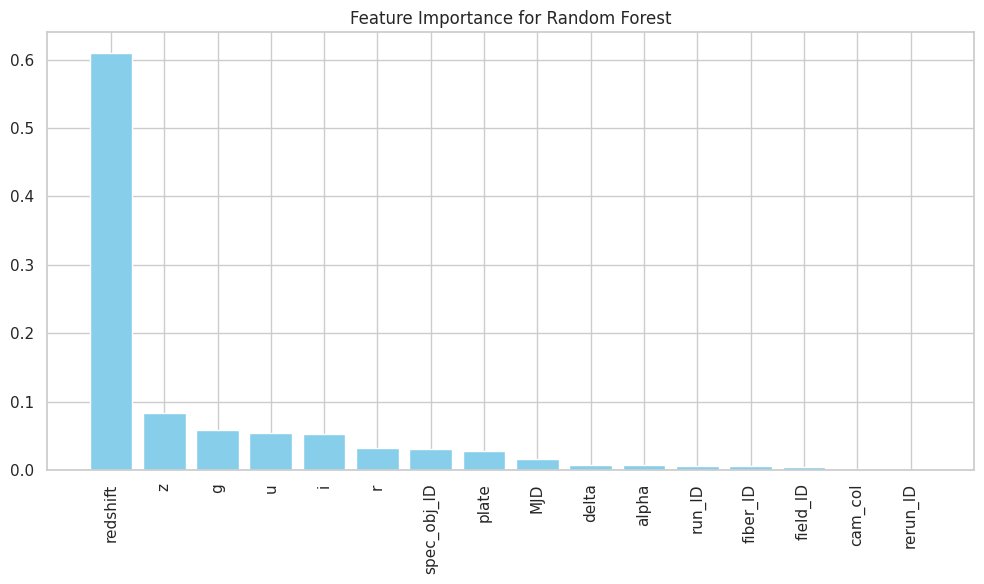

------------------------------------------------------------
Training Logistic Regression...


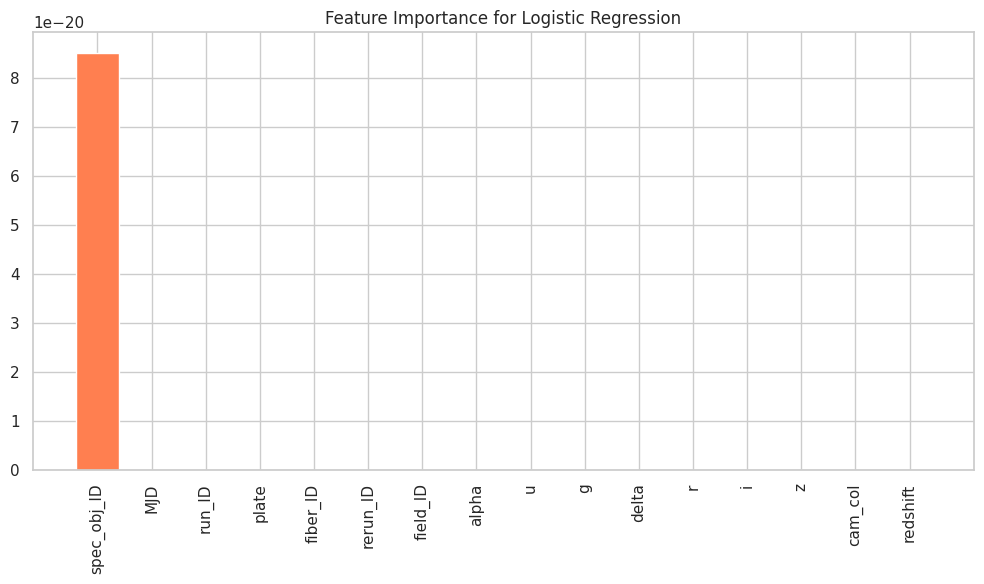

------------------------------------------------------------
Training Decision Tree...


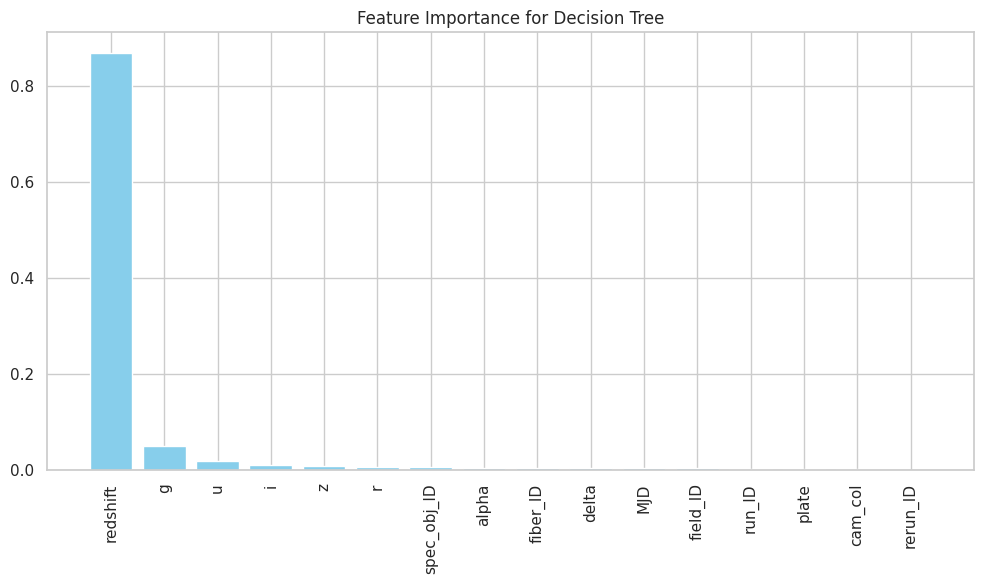

------------------------------------------------------------


In [35]:
models = {"Random Forest": RandomForestClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Decision Tree": DecisionTreeClassifier()}

# Now your loop will work correctly
# Get the feature names
feature_names = X_train.columns

# Iterate over the models
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Plot feature importance for models that support it
    if hasattr(model, 'feature_importances_'):

        # Tree-based models
        importance = model.feature_importances_
        indices = np.argsort(importance)[::-1]

        # Plot
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature Importance for {model_name}")
        plt.bar(range(X_train.shape[1]), importance[indices], align="center", color='skyblue')
        plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
        plt.tight_layout()
        plt.show()

    elif model_name == "Logistic Regression":

        # For Logistic Regression, use the coefficients
        importance = np.abs(model.coef_[0])

        # Absolute value of the coefficients
        indices = np.argsort(importance)[::-1]

        # Plot
        plt.figure(figsize=(10, 6))
        plt.title(f"Feature Importance for {model_name}")
        plt.bar(range(X_train.shape[1]), importance[indices], align="center", color='coral')
        plt.xticks(range(X_train.shape[1]), feature_names[indices], rotation=90)
        plt.tight_layout()
        plt.show()

    else:
        print(f"Feature importance not available for {model_name}")

    print("-" * 60)

**Dominance of Redshift:** Across Random Forest and Decision Tree, redshift consistently stands out as the most influential feature. This indicates that redshift has a significant impact on object classification in the dataset.

**Model Behavior:**
**Ensemble Methods (Random Forest): **They show a more balanced usage of features compared to simpler models like Decision Tree, although redshift still dominates.

**Logistic Regression:** This model seems to fail in capturing the important features, as reflected by the extremely low importance scores for all features.

**Random Forest and Decision Tree** clearly highlight the importance of redshift, which should be further investigated to understand its contribution to the classification problem.


**Logistic Regression** seems to underperform, so it might not be ideal for this particular dataset unless feature scaling or transformation is applied.

# **EVALUATION AND METRICS**

Training Naive Bayes...


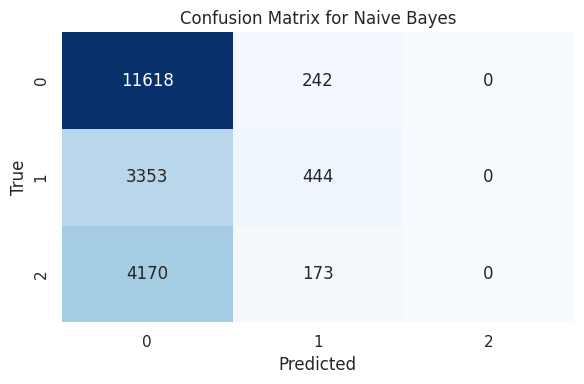

------------------------------------------------------------
Training Decision Tree...


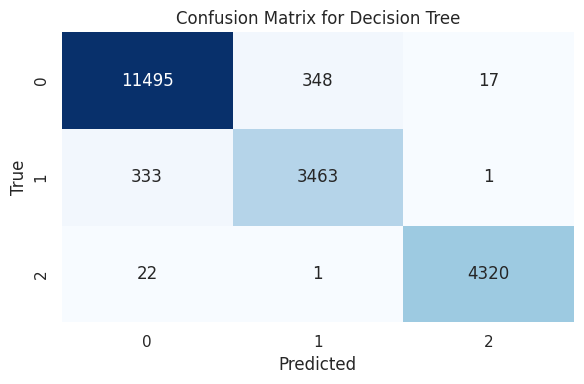

------------------------------------------------------------
Training Random Forest...


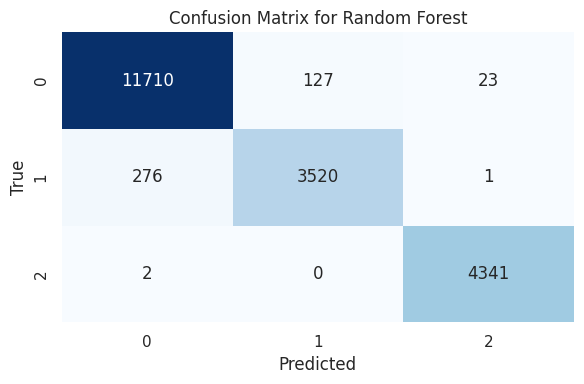

------------------------------------------------------------
Training Logistic Regression...


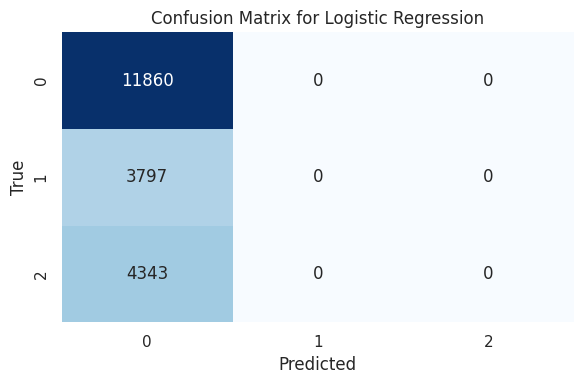

------------------------------------------------------------
Training AdaBoost...


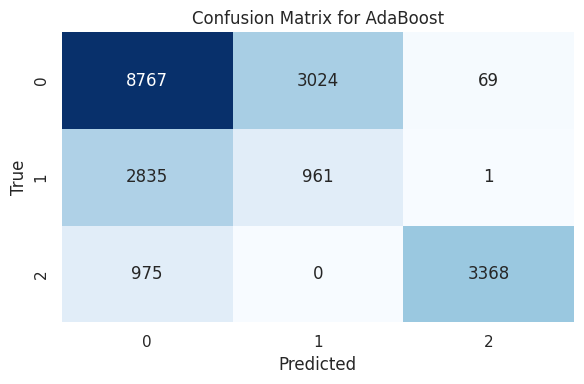

------------------------------------------------------------
Training XGBoost...


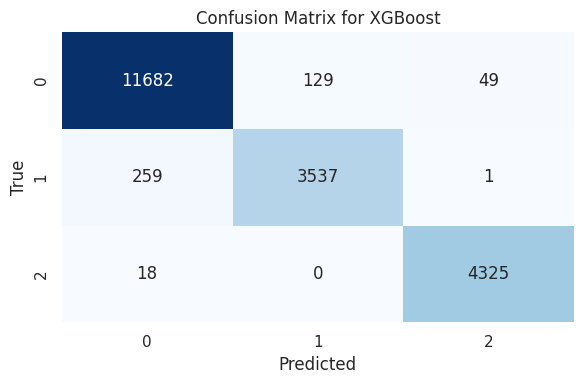

------------------------------------------------------------
Training K-Nearest Neighbors...


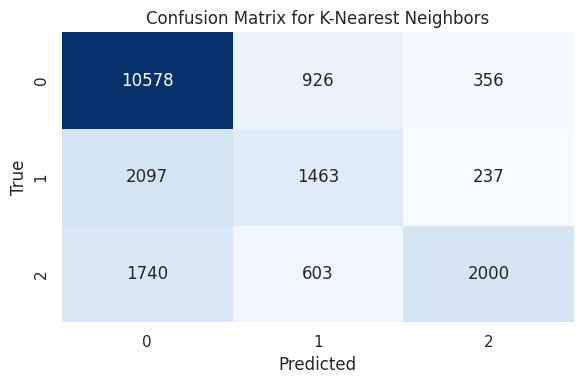

------------------------------------------------------------
Training Gradient Boosting...


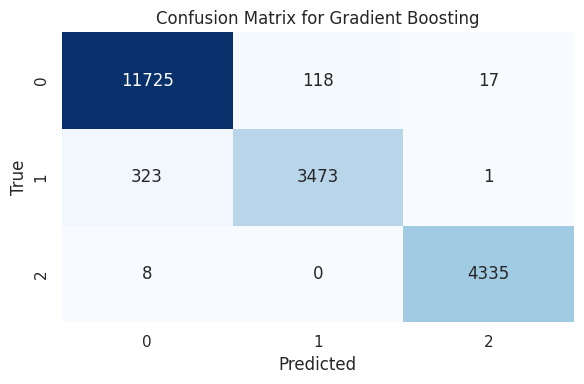

------------------------------------------------------------


In [36]:
from sklearn.metrics import confusion_matrix

# Define the models in a dictionary
models = {"Naive Bayes": GaussianNB(),
          "Decision Tree": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
          "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000),
          "AdaBoost": AdaBoostClassifier(random_state=45),
          "XGBoost": XGBClassifier(random_state=42),
          "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
          "Gradient Boosting": GradientBoostingClassifier(random_state=42)
         }

# Iterate over the models and plot the confusion matrix for each one
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model with the dataset
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.tight_layout()
    plt.show()

    print("-" * 60)

**Top Performers:** Random Forest, XGBoost and Gradient Boosting are the best models, showing high accuracy and minimal misclassifications across all classes.


**Underperformers:** Logistic Regression and Naive Bayes struggled significantly, especially with classes 1 and 2, indicating that these models are not suitable for this problem.


**Moderate Performers:** AdaBoost and KNN showed some imbalances and misclassifications, especially with class 2, but performed better than Logistic Regression and Naive Bayes.

For deployment, focusing on ensemble models like Random Forest, XGBoost and Gradient Boosting would likely yield the best results

Training Naive Bayes...


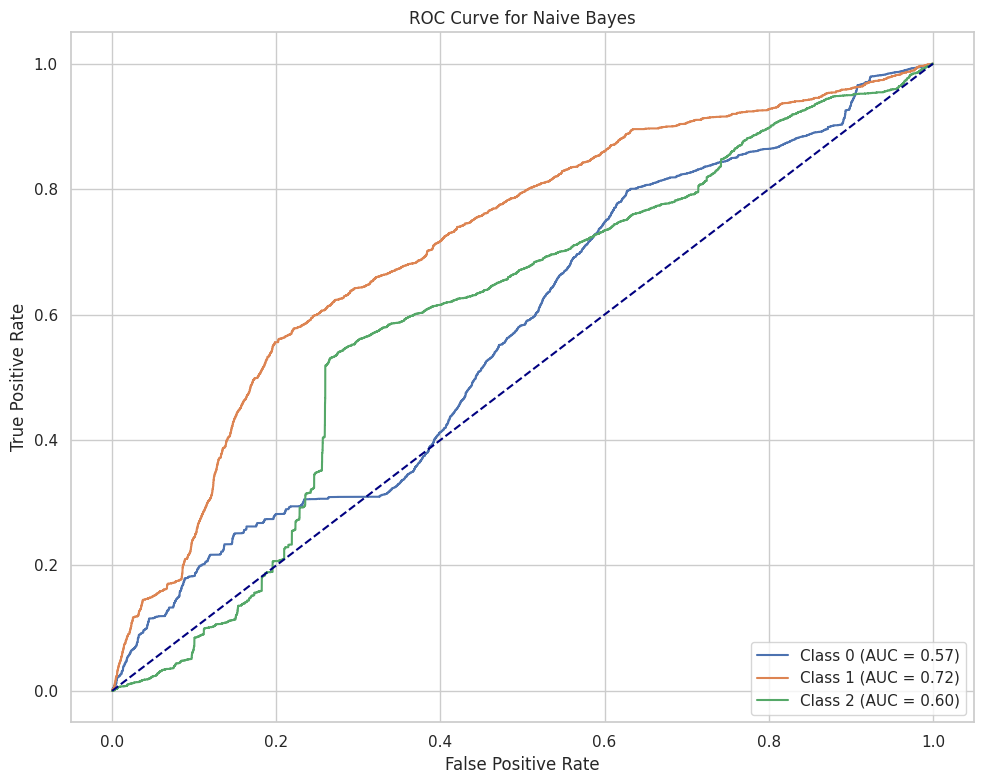

Training Decision Tree...
There are NaN values in the predictions for model Decision Tree. Skipping this model.
Training Random Forest...


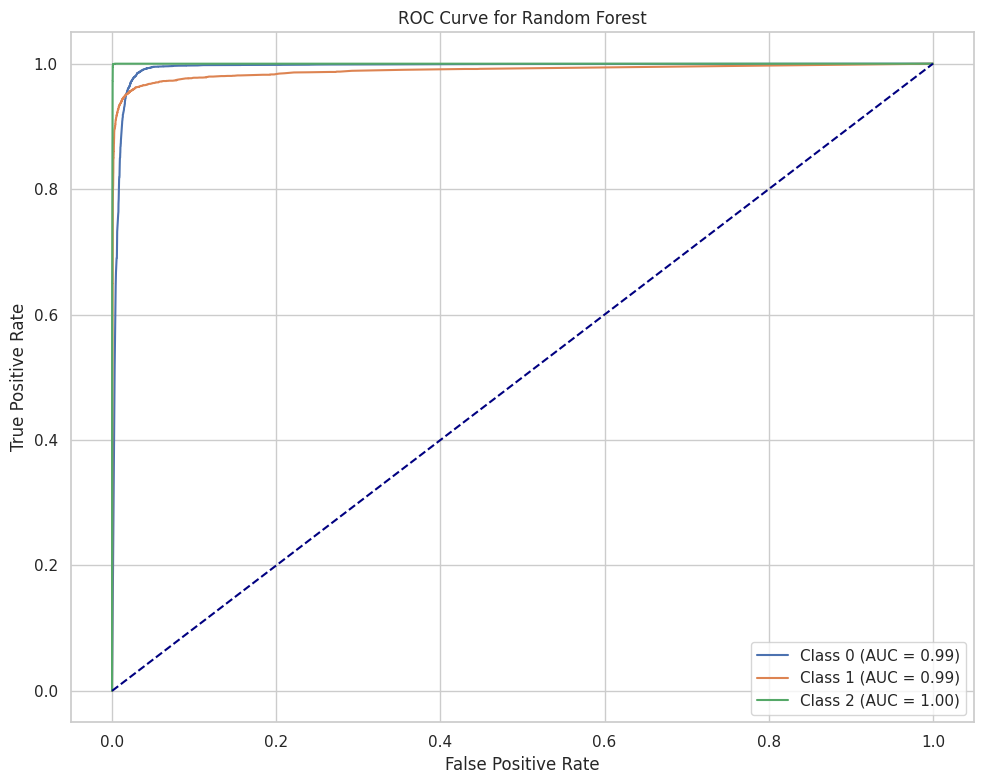

Training Logistic Regression...


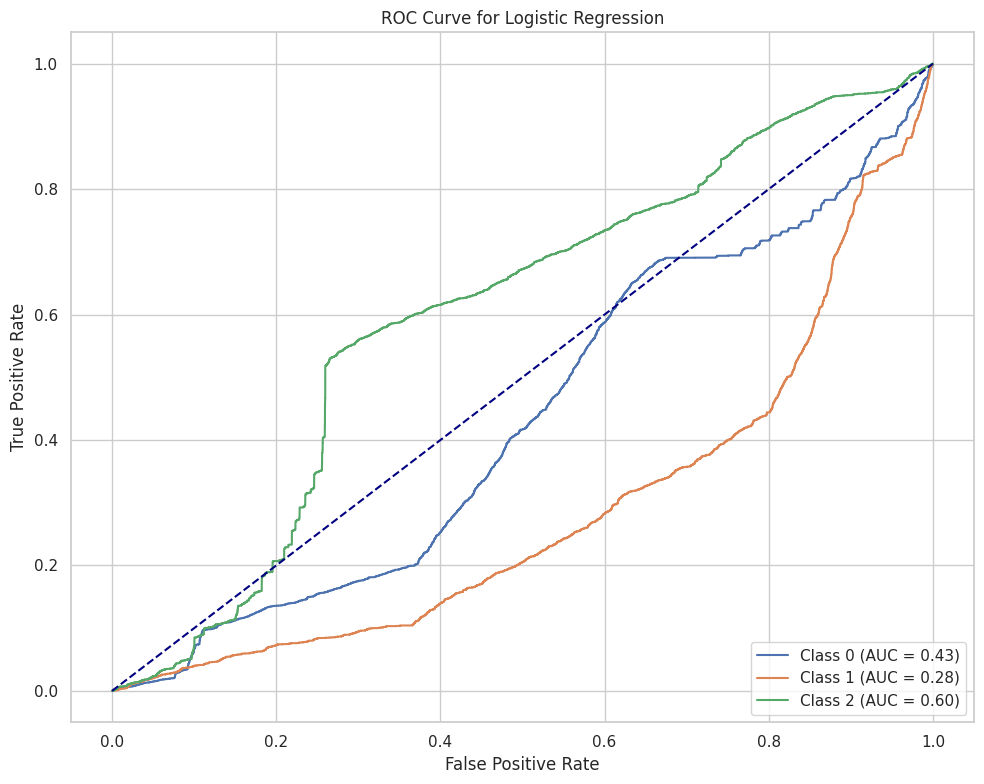

Training AdaBoost...


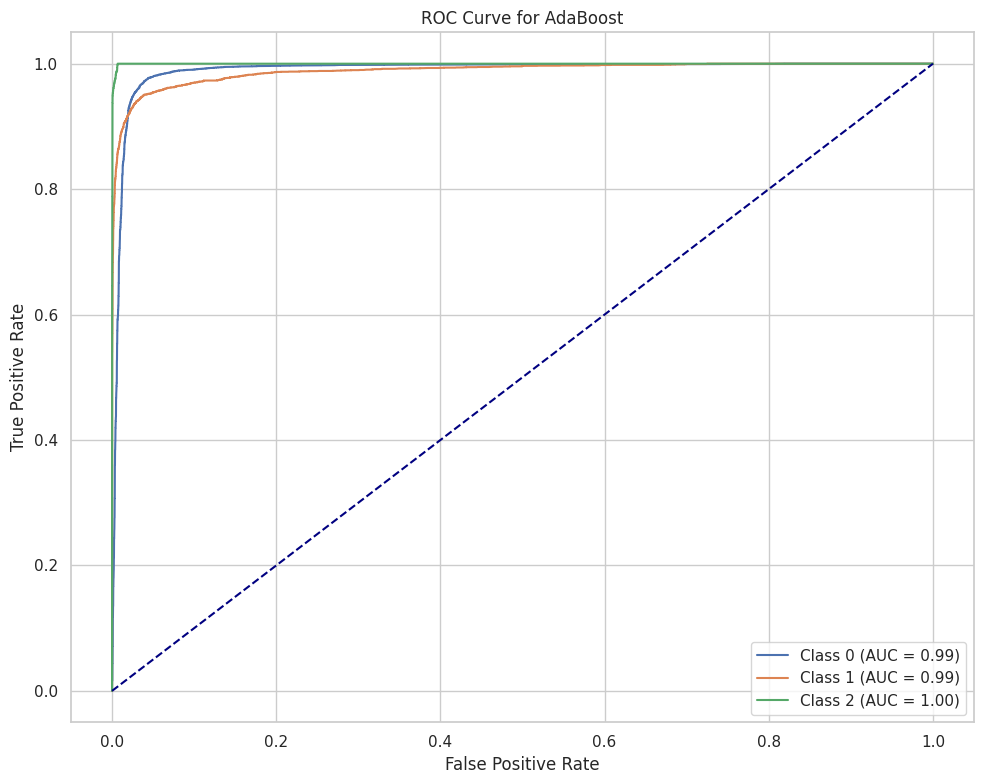

Training XGBoost...


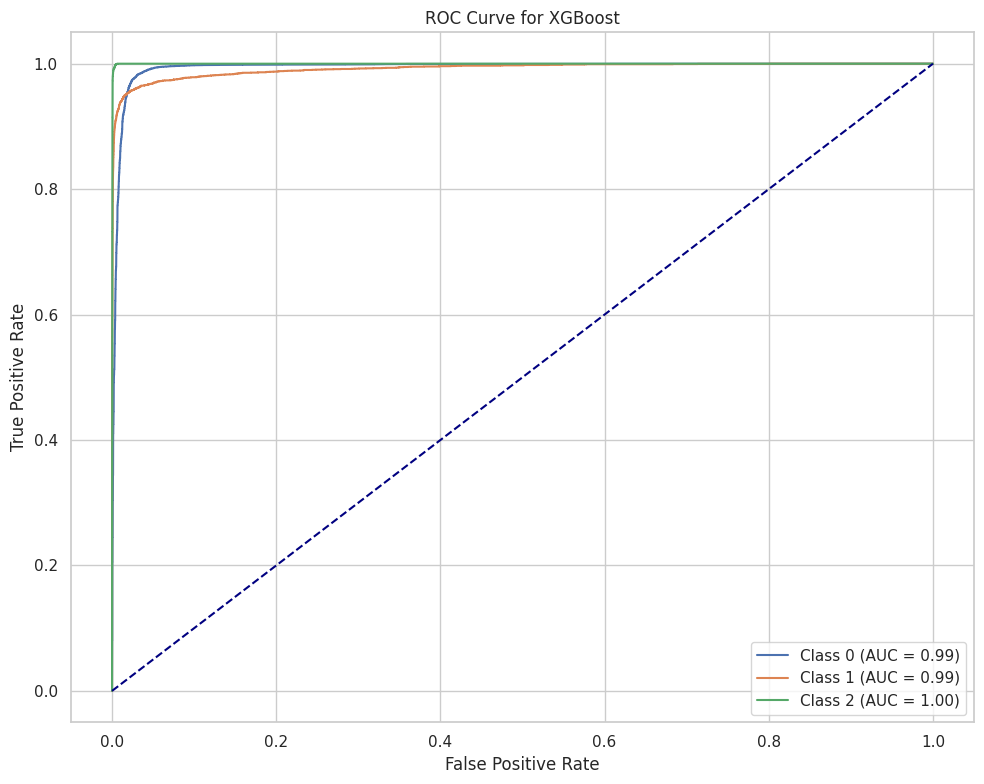

Training K-Nearest Neighbors...


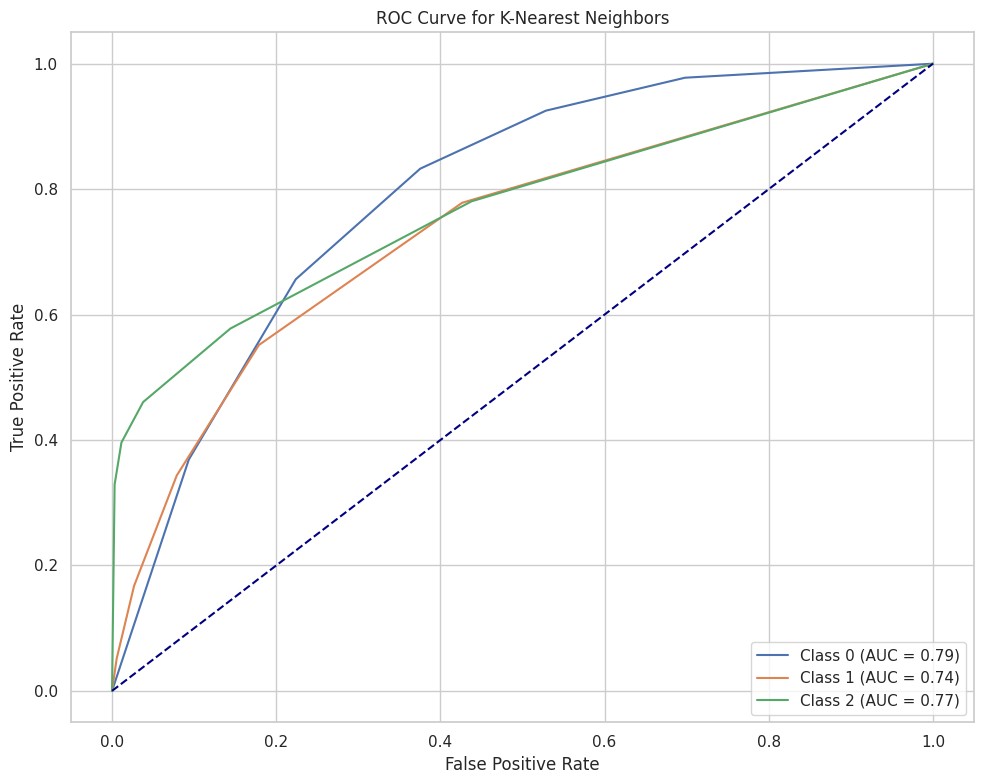

Training Gradient Boosting...


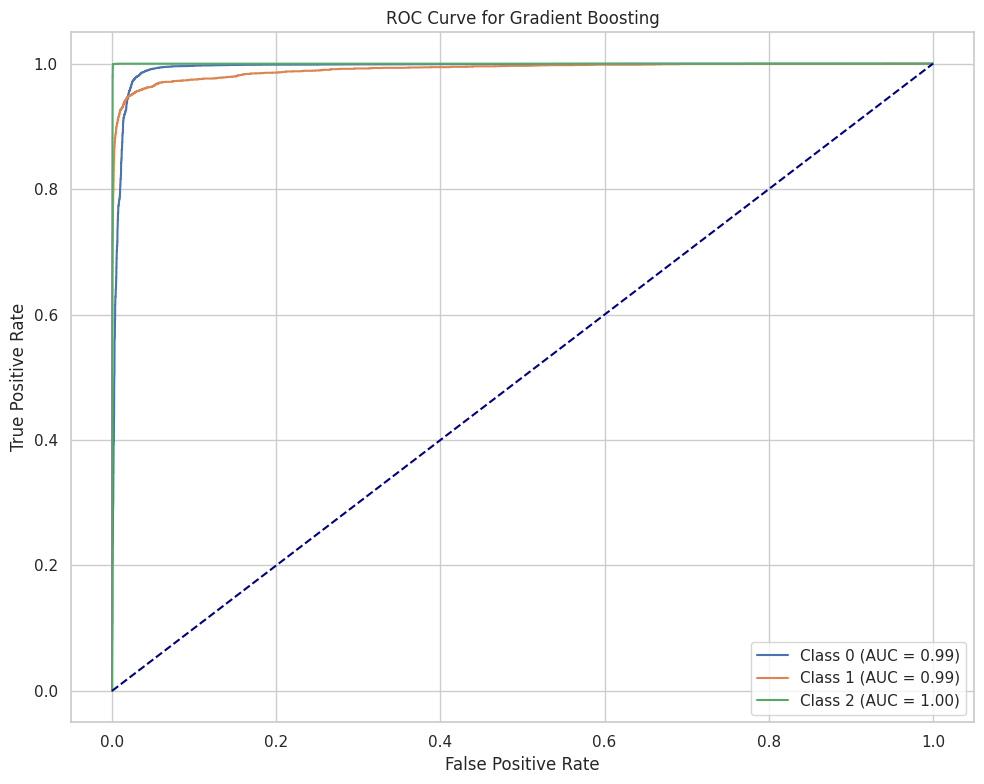

In [37]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import RocCurveDisplay

# Define the models in a dictionary
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=45),
    "XGBoost": XGBClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Binarize the target for the ROC curve (One-vs-Rest)
classes = np.unique(y_train)
y_test_bin = label_binarize(y_test, classes=classes)
y_train_bin = label_binarize(y_train, classes=classes)

# Iterate over the models and plot the ROC curve for each one
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Use One-vs-Rest strategy for multi-class classification
    classifier = OneVsRestClassifier(model)
    classifier.fit(X_train, y_train)

    # Predict the probabilities for the test data
    y_prob = classifier.predict_proba(X_test)

    # Check for NaN values in the predictions
    if np.isnan(y_prob).sum() > 0:
        print(f"There are NaN values in the predictions for model {model_name}. Skipping this model.")
        continue

    # Plot the ROC curve for each class
    plt.figure(figsize=(10, 8))
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.2f})")

    # Finalize the ROC plot
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')  # Diagonal line for "random guessing"
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve for {model_name}")
    plt.legend(loc="lower right")
    plt.tight_layout()
    plt.show()

**Best Performing Models:** Random Forest, AdaBoost, XGBoost and Gradient Boosting all perform exceptionally well, with AUC values close to 1 for all classes. These models would be considered the best choices based on the ROC analysis.

**Moderate Performing Models:** KNN shows reasonable performance with AUC values around 0.74-0.79, but it's not as strong as the ensemble methods.

**Poor Performing Models:** Logistic Regression and Naive Bayes perform the worst, especially Logistic Regression, which struggles to distinguish between the classes with AUC values as low as 0.28 for class 1.

In [38]:
from sklearn.metrics import classification_report

# Define the models in a dictionary
models = {"Naive Bayes": GaussianNB(),
          "Decision Tree": DecisionTreeClassifier(random_state=42),
          "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
          "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000),
          "AdaBoost": AdaBoostClassifier(random_state=45),
          "XGBoost": XGBClassifier(random_state=42),
          "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
          "Gradient Boosting": GradientBoostingClassifier(random_state=42)}

# Iterate over the models and compute classification reports
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Compute and display the classification report
    print(f"Classification Report for {model_name}:")
    report = classification_report(y_test, y_pred)
    print(report)
    print("-" * 60)

Training Naive Bayes...
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.61      0.98      0.75     11860
           1       0.52      0.12      0.19      3797
           2       0.00      0.00      0.00      4343

    accuracy                           0.60     20000
   macro avg       0.37      0.37      0.31     20000
weighted avg       0.46      0.60      0.48     20000

------------------------------------------------------------
Training Decision Tree...
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11860
           1       0.91      0.91      0.91      3797
           2       1.00      0.99      1.00      4343

    accuracy                           0.96     20000
   macro avg       0.96      0.96      0.96     20000
weighted avg       0.96      0.96      0.96     20000

-----------------------------------------------

# **METRICS**

In [39]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score
from sklearn.preprocessing import label_binarize

# Binarize the output for multiclass ROC curve (One-vs-Rest)
classes = np.unique(y_train)  # Unique classes
y_test_bin = label_binarize(y_test, classes=classes)  # Binarize only the test set for ROC curve

# Define models in a dictionary
models = {
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=50, max_iter=1000),
    "AdaBoost": AdaBoostClassifier(random_state=45),
    "XGBoost": XGBClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Initialize an empty list to store metrics
metrics_list = []

# Set a custom threshold
threshold = 0.6

# Iterate over the models
for model_name, model in models.items():

    # Train the model with balanced data
    model.fit(X_train, y_train)

    # Get predicted probabilities
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)  # Multiclass probability prediction
    else:
        # For models like SVC that do not have predict_proba by default, use decision_function
        y_prob = model.decision_function(X_test)

    # Calculate AUC-ROC for multiclass
    auc_roc = roc_auc_score(y_test_bin, y_prob, multi_class='ovr', average='weighted')

    # Apply threshold to calculate F1-Score with custom threshold
    y_pred_threshold = (y_prob >= threshold).astype(int)
    f1_with_threshold = f1_score(y_test_bin, y_pred_threshold, average='weighted')

    # Append metrics for this model
    metrics_list.append({'Model': model_name, 'AUC-ROC': auc_roc, 'F1-Score with Threshold': f1_with_threshold})

# Convert metrics list to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Find the best model based on AUC-ROC
best_model_idx = metrics_df['AUC-ROC'].idxmax()

# Function to highlight the best model row in yellow
def highlight_best(s):
    return ['background-color: blue' if s.name == best_model_idx else '' for _ in s]

# Apply the highlight function to the DataFrame
styled_df = metrics_df.style.apply(highlight_best, axis=1)
styled_df

# **Analysis of Model Performance Based on AUC-ROC and F1-Score with Threshold**

**AUC-ROC: **Measures the area under the ROC curve, representing the model's ability to distinguish between classes. A higher AUC-ROC means better classification performance.

**F1-Score with Threshold:** This is the harmonic mean of precision and recall, calculated using a custom threshold for decision-making. The higher the F1-score, the better the balance between precision and recall.

**Best Performer:** XGBoost is the top model in both AUC-ROC and F1-score, making it the most effective classifier for this task. Its near-perfect AUC-ROC indicates excellent class separation, and its high F1-score shows a strong balance of precision and recall.


**Other Strong Performers:** Random Forest and Gradient Boosting also perform very well, with high AUC-ROC and F1-scores. These models are all suitable for this classification task and provide reliable results.


**Moderate Performers:** AdaBoost and KNN provide decent results but are not as effective as the top ensemble models.

**Poor Performers: **Naive Bayes and Logistic Regression are the weakest models, with low AUC-ROC and F1-scores, indicating they struggle with this classification problem.

# **ML MODEL RESULT**

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# List of models for comparison
models = [
    ('Naive Bayes', GaussianNB()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=50, max_iter=1000)),
    ('AdaBoost', AdaBoostClassifier(random_state=45)),
    ('XGBoost', XGBClassifier(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# List to store the metrics of each model
metrics_list = []

# Iterate over the models
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate the metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Store the metrics of this model
    metrics_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

# Convert the list of metrics into a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Find the best model based on F1-Score (or Accuracy if preferred)
best_model_idx = metrics_df['F1-Score'].idxmax()

# Function to highlight the best model with a yellow background
def highlight_best(s):
    return ['background-color: blue' if s.name == best_model_idx else '' for _ in s]

# Apply the highlight function to the DataFrame
styled_df = metrics_df.style.apply(highlight_best, axis=1)

# Display the DataFrame with the best model highlighted
styled_df

# **Analysis of Model Performance:**

1. **Naive Bayes:**

Summary: Naive Bayes has the lowest precision and F1-score in this comparison. This model misclassifies a large proportion of samples, indicating it struggles to capture patterns in the data. It may work poorly for complex, non-linear relationships.


---


2. **Decision Tree:**

Summary: The Decision Tree performs very well, with all metrics above 96%. It is a strong classifier, but Decision Trees are prone to overfitting, meaning it could perform worse on unseen data.


---


3. **Random Forest (Highlighted in blue):**

Summary: Random Forest is the top-performing model in the table, offering high accuracy, precision, and recall. This suggests that it is highly robust, able to handle complex data while providing reliable predictions. Its ability to prevent overfitting, due to its ensemble nature, makes it a great choice.


---


4. **Logistic Regression:**

Summary: Logistic Regression struggles in this classification problem, achieving a low precision of 35.16%. This model fails to capture non-linear relationships in the data and does not perform well overall.


---


5. **AdaBoost:**

Summary: AdaBoost improves upon Logistic Regression and Naive Bayes, but still does not reach the level of ensemble models like Random Forest. It is moderately effective, but its F1-score indicates it’s not as balanced as the higher-ranked models.


---


6. **XGBoost:**

Summary: XGBoost is another strong performer, achieving very high precision, recall, and F1-scores, just slightly below Random Forest. It is a powerful and popular gradient boosting model that excels at handling structured data.


---



7. **K-Nearest Neighbors (KNN):**

Summary: KNN provides moderate performance, with accuracy and precision at 70%. It performs decently, but it falls behind the ensemble models (Random Forest, XGBoost, LightGBM). KNN might also struggle with scalability in large datasets.


---


8. **Gradient Boosting:**

Summary: Gradient Boosting performs slightly lower than LightGBM but is still a top-tier performer. It balances all metrics well, making it a highly reliable model for this classification task.


---

**Top Performers:** Random Forest and XGBoost are the top models in terms of overall performance (high accuracy, precision, recall, and F1-score). Random Forest has the slight edge with the best balance across all metrics.

**Moderate Performers:** Decision Tree and Gradient Boosting are also strong models but slightly behind the top three. AdaBoost and KNN offer moderate performance but are not on par with the stronger models.

**Poor Performers:** Naive Bayes and Logistic Regression are the worst-performing models in this comparison, struggling with low precision and F1-scores.

